In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df = pd.read_csv('../data/train.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [109]:
# 调整训练集格式
# df.Datetime = pd.to_datetime(df.Datetime)
df.Datetime = pd.to_datetime(df.Datetime, format='%d-%m-%Y %H:%M') 
df.index = df.Datetime
df = df.drop(['ID','Datetime'], axis=1)  
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [111]:
# 合并日期数据，按日统计
df_day = df.resample('D').sum()
df_day.head()

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [112]:
# 修改列名，采用prophet的保留字作为列名
# df_day.rename(columns={'Datetime':'ds','Count':'y'},inplace=True) 
df_day['ds'] = df_day.index
df_day['y'] = df_day['Count']
df_day = df_day.drop(['Count'], axis=1)  

In [113]:
from fbprophet import Prophet
# 拟合prophet模型, 预测未来7个月（213天）
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
model.fit(df_day)
future = model.make_future_dataframe(periods=213)
forecast = model.predict(future)
forecast


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-692.724556,-2320.635684,128.940286,-692.724556,-692.724556,-420.456911,-420.456911,-420.456911,-994.415163,-994.415163,-994.415163,573.958252,573.958252,573.958252,0.0,0.0,0.0,-1113.181467
1,2012-08-26,-684.600647,-2429.543867,-74.192679,-684.600647,-684.600647,-578.263252,-578.263252,-578.263252,-1143.372038,-1143.372038,-1143.372038,565.108787,565.108787,565.108787,0.0,0.0,0.0,-1262.863898
2,2012-08-27,-676.476738,-728.078825,1646.960417,-676.476738,-676.476738,1010.653598,1010.653598,1010.653598,457.253157,457.253157,457.253157,553.400441,553.400441,553.400441,0.0,0.0,0.0,334.176860
3,2012-08-28,-668.352829,-745.176572,1644.853306,-668.352829,-668.352829,1147.567551,1147.567551,1147.567551,607.925487,607.925487,607.925487,539.642065,539.642065,539.642065,0.0,0.0,0.0,479.214722
4,2012-08-29,-660.228920,-748.370445,1639.872949,-660.228920,-660.228920,1081.166087,1081.166087,1081.166087,556.504743,556.504743,556.504743,524.661344,524.661344,524.661344,0.0,0.0,0.0,420.937167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16215.954450,15234.864857,17753.960089,15800.881858,16607.934065,294.785586,294.785586,294.785586,556.504743,556.504743,556.504743,-261.719157,-261.719157,-261.719157,0.0,0.0,0.0,16510.740036
971,2015-04-23,16243.372814,15072.465420,17551.105891,15824.976649,16636.150237,61.956975,61.956975,61.956975,360.142751,360.142751,360.142751,-298.185776,-298.185776,-298.185776,0.0,0.0,0.0,16305.329789
972,2015-04-24,16270.791178,14742.858545,17284.122299,15849.071440,16664.040964,-183.314072,-183.314072,-183.314072,155.961065,155.961065,155.961065,-339.275137,-339.275137,-339.275137,0.0,0.0,0.0,16087.477106
973,2015-04-25,16298.209541,13648.115731,16173.332003,15873.166231,16695.644060,-1378.627381,-1378.627381,-1378.627381,-994.415163,-994.415163,-994.415163,-384.212217,-384.212217,-384.212217,0.0,0.0,0.0,14919.582161


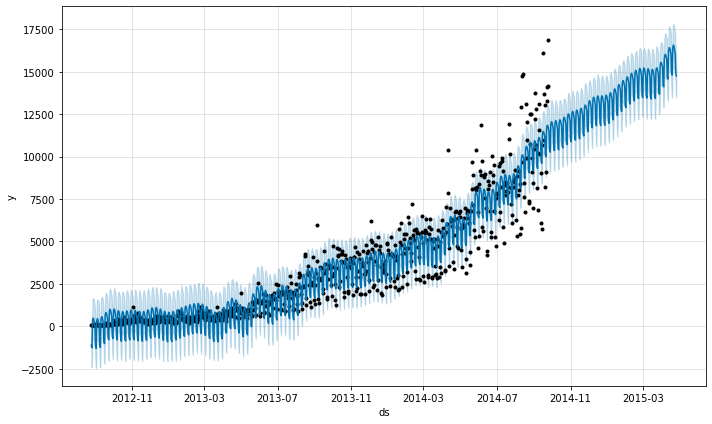

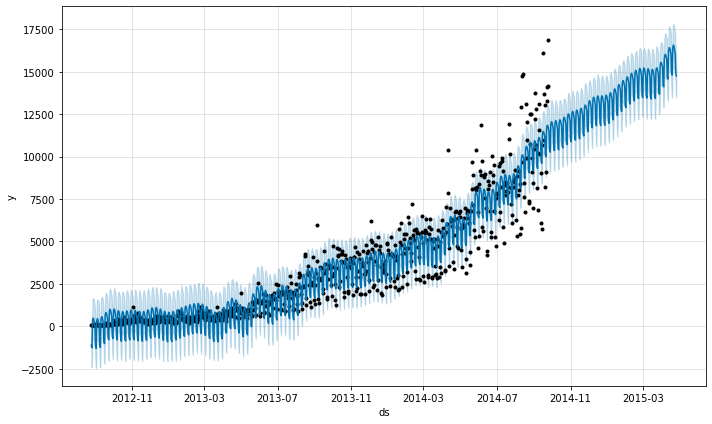

In [115]:
model.plot(forecast)